# Tensorflow Image Manipulation Tutorial

Tensorflow is an open-source end-to-end platform for machine learning. Tensorflow has a huge variety of modules for data manipulation. This tutorial is focused on the image manipulation tools present in the image module. 

https://www.tensorflow.org/api_docs/python/tf/image

In [ ]:
!wget https://www.travelanddestinations.com/wp-content/uploads/2019/01/Osaka-Japan-at-night.jpg

In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

The modules used in this tutorial are:

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

We load the image using wget command, this downloads the file into the current directory. 

In [ ]:
# Here we are using the utils model in tensorflow to load an image from the current diectory

img= tf.keras.utils.load_img(
    'Osaka-Japan-at-night.jpg', grayscale=False, color_mode='rgb', target_size=None,
    interpolation='nearest'
)

# Image Resizing

In [ ]:
plt.figure(figsize=(15,15))
plt.title("Original",fontsize=20)
plt.imshow(img)
plt.show()

In [ ]:
print(img.size) 

The image size can be observed

In [ ]:
print(img)

The data format of the image is PIL. tf.utils module uses the PIL library to receive the image.

In [ ]:
size=(1000,1500)
# Bilinear resize method is chosen
# Given below are all the options for Resizing available.
'''
AREA	'area'
BICUBIC	'bicubic'
BILINEAR	'bilinear'
GAUSSIAN	'gaussian'
LANCZOS3	'lanczos3'
LANCZOS5	'lanczos5'
MITCHELLCUBIC	'mitchellcubic'
NEAREST_NEIGHBOR	'nearest'
'''
re = tf.image.resize(
    np.array(img), size, method=tf.image.ResizeMethod.BILINEAR, preserve_aspect_ratio=False,
    antialias=False, name=None
)


Using tf.image.resize changes the data type being stored. Now the class will be an EagerTensor that needs to be converted to numpy format before plotting.

In [ ]:
print(type(re))

In [ ]:
re

In [ ]:
# Resize returns float value
re=re.numpy().astype('uint8')

plt.figure(figsize=(15,15))
plt.title("Resized_(1000x1500)",fontsize=20)
plt.imshow(re)
plt.show()

The image will be resized now.

In [ ]:
np.shape(re)

For some machine learning applications we need to perform a padding operation that keeps the aspect ratio intact while changing the size of the image. Padding is used when upscaling, when downscaling, we have an option to keep the image as it is (with the aspect ratio intact) or crop it. 

In [ ]:
size=[1000,1900]
# Padding keeps the aspect ratio intact while padding
re= tf.image.resize_with_pad(
    np.array(img), size[0], size[1], method=tf.image.ResizeMethod.BILINEAR,
    antialias=False
)

re = re.numpy().astype('uint8')
plt.figure(figsize=(15,15))
plt.axis('off')
plt.title("Resized with padding (1000x1900)",fontsize=20)
plt.imshow(re)
plt.show()

In [ ]:
size=[500,500]
re = tf.image.resize_with_crop_or_pad(
    np.array(img), size[0], size[1]
)
re = re.numpy().astype('uint8')
plt.figure(figsize=(15,15))
plt.axis('off')
plt.title("Resized with padding_cropping (500x500)",fontsize=20)
plt.imshow(re)
plt.show()

# Bounding Box

The use of bounding boxes are in ML applications like the YOLO algorithm. [y_min, x_min, y_max, x_max] is the bounding box format. The values are scaled between 0 and 1.

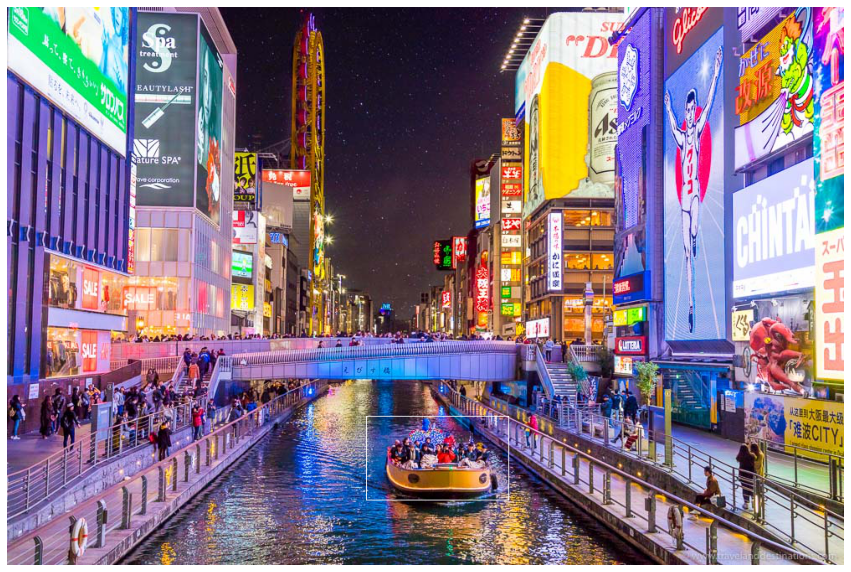

In [38]:
y_min = 490
x_min = 430
y_max = 590 
x_max = 600
# normalized with ---> (1000, 667)

batch = []
boxes =[]

box=[y_min/667,x_min/1000,y_max/667,x_max/1000]
boxes.append(box)
# batch represents our bounding box format for this image

batch.append(boxes)
colors = np.array([[255, 255, 255]])

# Reshaping Tensor to 4D format [batch-size,width,height,depth]
re = np.array([np.array(img)],dtype='float32')

re = tf.image.draw_bounding_boxes(
    re, batch, colors, name=None
)
re = re.numpy().astype('uint8')
plt.figure(figsize=(15,15))
plt.axis('off')
#plt.title("Resized with padding_cropping (500x500)",fontsize=20)
plt.imshow(re[0])
plt.show()

# Colorspace Conversions

In [ ]:
# R,G and B channels are split
re = tf.concat([np.array(img)[:,:,0],np.array(img)[:,:,1],np.array(img)[:,:,2]],axis=1)

plt.figure(figsize=(15,15))
plt.title("RGB channels in grayscale",fontsize=20)
plt.axis('off')
plt.imshow(re,"gray")
plt.show()

# Colourspace conversion
re = tf.image.rgb_to_grayscale(
    np.array(img), name=None
)
# re = re.numpy().astype('uint8')
plt.figure(figsize=(15,15))
plt.title("Colourspace Conversion To Grayscale",fontsize=20)
plt.axis('off')
plt.imshow(re[:,:,0],"gray")
plt.show()

In [ ]:
re = tf.image.rgb_to_hsv(
    np.array(img), name=None
)
# H,S and V channels are split and plotted
re_ch = tf.concat([np.array(re)[:,:,0]*255,np.array(re)[:,:,1]*255,np.array(re)[:,:,2]],axis=1)

plt.figure(figsize=(15,15))
plt.title("HSV channels in grayscale",fontsize=20)
plt.axis('off')
plt.imshow(re_ch,"gray")
plt.show()


# Grayscale Gradient Computation

In [ ]:
import numpy as np

# Grey Scale Conversion
re = tf.image.rgb_to_grayscale(
    np.array(img), name=None
)

# Reshaping Tensor to 4D format [batch-size,width,height,depth]
grad = tf.constant([np.array(re)])
rex,rey= tf.image.image_gradients(
    grad)
space = np.zeros(rex[0].shape)
plt.figure(figsize=(15,15))
plt.title("Gradient in x and y direction",fontsize=20)
plt.axis('off')
plt.imshow(tf.concat([rex[0],space[:,0:100,:]+200,rey[0]],axis=1)[:,:,0],"gray")
plt.show()


# Data Augmentation

In [ ]:
# Brightness and Contrast functions
re_b = tf.image.adjust_brightness(
    np.array(img), delta=0.2
)
re_c = tf.image.adjust_contrast(
    np.array(img), contrast_factor=2
)
space = np.zeros(re_c.shape)

plt.figure(figsize=(15,15))
plt.title("Brightness and Contrast",fontsize=20)
plt.axis('off')
plt.imshow(tf.concat([re_b,space[:,0:100,:]+255,re_c],axis=1))
plt.show()


In [ ]:

# Fliping and Rotation
re_lr=tf.image.flip_left_right(
    np.array(img)
)

re_ud=tf.image.flip_up_down(
    np.array(img)
)
plt.figure(figsize=(15,15))
plt.imshow(tf.concat([re_lr,space[:,0:100,:]+255,re_ud],axis=1))
plt.title("Flip Left/Right or Up/Down",fontsize=20)
plt.axis('off')
plt.show()



In [ ]:
re_rot=tf.image.rot90(
    np.array(img)
)
plt.figure(figsize=(10,10))
plt.title("Rotation 90 degrees",fontsize=20)
plt.axis('off')
plt.imshow(re_rot)
plt.show()